In [1]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [3]:
np.random.seed(7)
tf.random.set_seed(7)

In [4]:
max_words = 10000
max_len = 500
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen=max_len, truncating='pre')

In [5]:
label_dict = {'pos':0, 'neg':1}
y = np.array([label_dict[c] for c in categories])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
len(X_train), len(X_test)

(1600, 400)

In [11]:
model = Sequential([Embedding(max_words, 64, input_length=max_len),
                    Conv1D(128, 5, padding='valid', activation='relu', strides=1),
                    MaxPooling1D(),
                    Conv1D(256, 5, padding='valid', activation='relu', strides=1),
                    MaxPooling1D(),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 496, 128)          41088     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 248, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 244, 256)          164096    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 122, 256)          0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 31232)            

In [12]:
adam = Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(X_train, y_train, epochs=30, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/30


5/5 [==============================] - 3s 425ms/step - loss: 0.7243 - acc: 0.5109 - val_loss: 0.6941 - val_acc: 0.4969
Epoch 2/30
5/5 [==============================] - 2s 393ms/step - loss: 0.6932 - acc: 0.4969 - val_loss: 0.6931 - val_acc: 0.4969
Epoch 3/30
5/5 [==============================] - 2s 386ms/step - loss: 0.6926 - acc: 0.4969 - val_loss: 0.6929 - val_acc: 0.4969
Epoch 4/30
5/5 [==============================] - 2s 384ms/step - loss: 0.6919 - acc: 0.4969 - val_loss: 0.6926 - val_acc: 0.4969
Epoch 5/30
5/5 [==============================] - 2s 384ms/step - loss: 0.6901 - acc: 0.4977 - val_loss: 0.6920 - val_acc: 0.4969
Epoch 6/30
5/5 [==============================] - 2s 387ms/step - loss: 0.6857 - acc: 0.5750 - val_loss: 0.6915 - val_acc: 0.4969
Epoch 7/30
5/5 [==============================] - 2s 375ms/step - loss: 0.6751 - acc: 0.6438 - val_loss: 0.6886 - val_acc: 0.5531
Epoch 8/30
5/5 [==============================] - 2s 388ms/step - loss: 0.6545 - acc: 0.7898 - val_lo

In [14]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

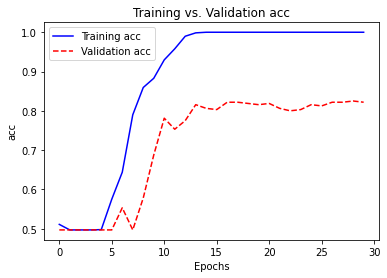

In [15]:
plot_results(history, 'acc')

In [16]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 14ms/step - loss: 0.6690 - acc: 0.8175


[0.669006884098053, 0.8174999952316284]